<p> <img src="https://drive.google.com/uc?export=view&id=14ecpPr37UaWMNtZYQ3TgLyvYO6Wgh-qA" align="right" width="150px"> </p>

# Atividade 4 - Análise Coautoria de Pesquisas PPGIA<br>
Professor orientador: Raimir Holanda Filho.<br>
Programa de Pós-Graduação em Informática Aplicada. Universidade de Fortaleza - UNIFOR.




In [1]:
# Configuração de plotagem
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (30, 30),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

# Fixação do seed
from numpy import random as nprand
seed = 200
nprand.seed(seed)

# Importação dos módulos do NetworkX
import networkx as nx
from networkx import bipartite
from networkx import NetworkXError
from networkx import edge_betweenness_centrality
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.centrality import girvan_newman

#Importação dos módulos de suporte
import re
import random
from numpy import random as nprand
import itertools

In [2]:
# Endereço da base de dados
local = '/content/drive/MyDrive/Colab Notebooks/GRAFOS/P3/'
csvfile = local + 'ppgia_coautoria-bipartite.csv'

# Criação do grafo não direcionado vazio
B = nx.Graph()

# Carregamento dos dados no grafo
with open(csvfile) as f:
    # Parse header
    cols = next(f).strip().split(";")[1:]
    cols = [item.lower() for item in cols]
    # Parse rows
    for row in f:
        rlist = ['&Lt;/I&Gt;', '&Lt;/B&Gt;']
        for r in rlist:
            row = re.sub(r, '', row)
        row = row.replace('Dama?Evi&Amp;#269;Ius', 'Damasevicius')
        linha = row.strip().split(";")
        pesquisa = linha[1]
        pesquisador = linha[2]
        B.add_edge(pesquisador, pesquisa)
        # Set node types
        B.nodes[pesquisador]["bipartite"] = 0
        B.nodes[pesquisa]["bipartite"] = 1
# Considerando apenas componentes concectados
B = B.subgraph(list(nx.connected_components(B))[0])  

In [3]:
# Identificação dos nós
pesquisadores = [v for v in B.nodes if B.nodes[v]["bipartite"] == 0]
pesquisas = [v for v in B.nodes if B.nodes[v]["bipartite"] == 1]

In [4]:
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.bipartite_layout(B, pesquisadores)
# Draw using different shapes and colors for autores/titulos
nx.draw_networkx_edges(B, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(B, pos, nodelist=pesquisas, node_color="#bfbf7f", node_shape="h", node_size=300)
nx.draw_networkx_nodes(B, pos, nodelist=pesquisadores, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(B, pos, alpha=.5)
plt.savefig(local + 'GRAFO_P3-1.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
# Lista dos pesquisadores com mais pesquisas publicadas no PPGIA
degree = B.degree
[(x, degree[x]) for x in sorted(pesquisadores, key=lambda x:B.degree[x], reverse=True)[:2]]

[('Victor Hugo Costa De Albuquerque', 157), ('Plácido Rogerio Pinheiro', 122)]

## Projeção

In [6]:
# Create co-affiliation network
G = bipartite.projected_graph(B, pesquisadores)
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(G, pos, alpha=.75)
plt.savefig(local + 'GRAFO_P3-2.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# Create co-affiliation network
H = bipartite.projected_graph(B, pesquisas)
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(H, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(H, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(H, pos, node_color="#bfbf7f", node_shape="h", node_size=300)
nx.draw_networkx_labels(H, pos, alpha=.25)
plt.savefig(local + 'GRAFO_P3-3.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
G = bipartite.weighted_projected_graph(B, pesquisadores)
list(G.edges(data=True))[0]

('Plácido Rogerio Pinheiro', 'Napoleão Vieira Nepomuceno', {'weight': 6})

In [9]:
# Create co-affiliation network
G = bipartite.overlap_weighted_projected_graph(B, pesquisadores)
# Create figure
plt.figure(figsize=(30,30))
# Get weights
weight = [G.edges[e]['weight'] for e in G.edges]
# Calculate layout
pos = nx.spring_layout(G, weight='weight', k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, edge_color=weight, edge_cmap=plt.cm.Blues, width=3, alpha=0.25)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(G, pos, alpha=.75)
plt.savefig(local + 'GRAFO_P3-4.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# Identifying nodes that act like bridges using betweenness centrality.
betweenness = nx.betweenness_centrality(G, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Victor Hugo Costa De Albuquerque', 239575.84548645603),
 ('Plácido Rogerio Pinheiro', 142757.75353791896),
 ('Maria Andréia Formico Rodrigues', 113266.98662166474),
 ('Joao Jose Vasco Peixoto Furtado', 87269.75638075174),
 ('Maria Elizabeth Sucupira Furtado', 69496.41579843791),
 ('João Batista Furlan Duarte', 58383.83399014437),
 ('Nabor Das Chagas Mendonça', 49702.91666666662),
 ('Raimir Holanda Filho', 44090.69339527223),
 ('André Luís Vasconcelos Coelho', 35449.63696742767),
 ('Joel J P C Rodrigues', 34803.88831242546)]

In [11]:
# Identifying highly-connected nodes using eigenvector centrality (hubs).
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Nabor Das Chagas Mendonça', 0.18276619014473042),
 ('Marco Tulio Oliveira Valente', 0.17720030572645215),
 ('Uira Kulesza', 0.17342726860133253),
 ('Vander Alves', 0.17342726860133253),
 ('Roberta Coelho', 0.17342726860133253),
 ('Eduardo Figueiredo', 0.17342726860133253),
 ('Paulo F Pires', 0.17342726860133253),
 ('Flavia C Delicato', 0.17342726860133253),
 ('Eduardo Piveta', 0.17342726860133253),
 ('Carla Silva', 0.17342726860133253)]

In [12]:
# Quantifying the distance between a node and the rest of the network
# using closeness centrality.
closeness = nx.closeness_centrality(G)
sorted(closeness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Victor Hugo Costa De Albuquerque', 0.47857838364167476),
 ('Plácido Rogerio Pinheiro', 0.4776482021379981),
 ('Plácido Rogério Pinheiro', 0.43572695035460995),
 ('Joel J P C Rodrigues', 0.43476337903582485),
 ('Raimir Holanda Filho', 0.4334215167548501),
 ('André Luís Vasconcelos Coelho', 0.42925764192139737),
 ('Joel Rodrigues', 0.4229776247848537),
 ('Deepak Gupta', 0.4152936206168145),
 ('Ashish Khanna', 0.4147679324894515),
 ('Lakshmanaprabu Sk', 0.41060985797827904)]

In [13]:
# Quantifying the number of triangles between a node and its neighbors.
triangles = nx.triangles(G)
sorted(triangles.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Victor Hugo Costa De Albuquerque', 1466),
 ('Plácido Rogerio Pinheiro', 606),
 ('Nabor Das Chagas Mendonça', 576),
 ('Marco Tulio Oliveira Valente', 520),
 ('Uira Kulesza', 496),
 ('Vander Alves', 496),
 ('Roberta Coelho', 496),
 ('Eduardo Figueiredo', 496),
 ('Paulo F Pires', 496),
 ('Flavia C Delicato', 496)]

In [14]:
# Quantifying the interconnectedness of a node's neighborhood.
clustering = nx.clustering(G)
# sorted(clustering.items(), key=lambda x:x[1], reverse=True)[0:10]
[(x, clustering[x]) for x in sorted(pesquisadores, key=lambda x:eigenvector[x], reverse=True)[:10]]

[('Nabor Das Chagas Mendonça', 0.23850931677018633),
 ('Marco Tulio Oliveira Valente', 0.6039488966318235),
 ('Uira Kulesza', 1.0),
 ('Vander Alves', 1.0),
 ('Roberta Coelho', 1.0),
 ('Eduardo Figueiredo', 1.0),
 ('Paulo F Pires', 1.0),
 ('Flavia C Delicato', 1.0),
 ('Eduardo Piveta', 1.0),
 ('Carla Silva', 1.0)]

In [15]:
degree = G.degree
[(x, degree[x]) for x in sorted(pesquisadores, key=lambda x:G.degree[x], reverse=True)[:10]]

[('Victor Hugo Costa De Albuquerque', 401),
 ('Plácido Rogerio Pinheiro', 203),
 ('Joel J P C Rodrigues', 109),
 ('Joao Jose Vasco Peixoto Furtado', 91),
 ('João Batista Furlan Duarte', 81),
 ('Maria Elizabeth Sucupira Furtado', 79),
 ('Raimir Holanda Filho', 72),
 ('Nabor Das Chagas Mendonça', 70),
 ('Victor Hugo C De Albuquerque', 69),
 ('Adriano Bessa Albuquerque', 60)]

In [16]:
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum([
        list(length_target.values())
        for length_target
        in length_source_target.values()],
    [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")

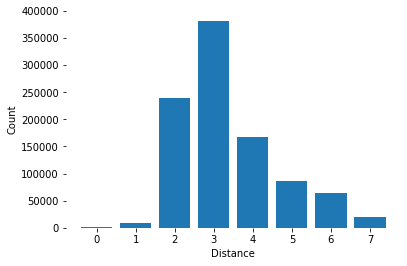

In [17]:
# Networks can be characterized according to their distribution of shortest path lengths.
path_length_histogram(G)

In [18]:
# Mean shortest path length (characteristic length)
print(nx.average_shortest_path_length(G))

# Size of a network characterized by the largest path length (diameter)
nx.diameter(G)

3.3665835463034184


7

## Global clustering

In [19]:
# Transitivity: the fraction of possible triangles that are present.
nx.transitivity(G)

0.23627202096686642

In [20]:
# Global clustering coefficient.
nx.average_clustering(G)

0.8760942438358248

In [21]:
# Density of a network  the fraction of possible edges that exist.
# The more edges present in a network, the more redundant paths exist between its nodes.
d = nx.density(G)
print(d)

0.009397563456814629


## Connectivity

In [24]:
# The node connectivity is the smallest min-cut over all node pairs. 
print(nx.minimum_node_cut(G))

# The edge connectivity is defined similarly.
print(nx.minimum_edge_cut(G))

# Average the connectivity over all nodes or edges
# print(nx.average_node_connectivity(G)) # tempo de execução > 40min

{'Plácido Rogerio Pinheiro'}
{('Raimir Holanda Filho', 'Alex Lacerda Ramos')}


In [25]:
# It seems the network can be divided into disconnected parts 
# by the removal of a single node or single edges.
print(nx.node_connectivity(G))
print(nx.edge_connectivity(G))

1
1


## Community Detection

## Modularity maximization
Find communities in graph using Clauset-Newman-Moore greedy modularity maximization.

In [26]:
# Find the communities
communities = sorted(greedy_modularity_communities(G), key=len, reverse=True)
# Count the communities
print('Total de comunidades:', len(communities))
print('Elementos maior comunidade:', len(communities[0]))

Total de comunidades: 31
Elementos maior comunidade: 140


In [27]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [28]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [29]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

In [30]:
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G)
# Draw external edges
nx.draw_networkx_edges(G, pos, edgelist=external, edge_color="#333333")

# Draw nodes and internal edges
nx.draw_networkx_edges(G, pos, edgelist=internal, edge_color=internal_color)
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=0)
# Draw labels
nx.draw_networkx_labels(G, pos, alpha=.25)
plt.savefig(local + 'GRAFO_P3-5.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

### Girvan-Newman Community Detection

In [31]:
result = girvan_newman(G)
communities = next(result)
len(communities)

2

In [32]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

In [33]:
# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

In [34]:
# Create figure
plt.figure(figsize=(30,30))
# Draw external edges
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw internal edges
nx.draw_networkx_edges(G, pos, edgelist=internal, edge_color=internal_color)
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_color)
# Draw lables
nx.draw_networkx_labels(G, pos, alpha=.25)
plt.savefig(local + 'GRAFO_P3-6.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

## Cliques

In [35]:
cliques = list(nx.find_cliques(G))
print(len(cliques))
cliques[:2]

431


[['Gabriel Paulino', 'Jose Everardo Bessa Maia', 'Raimir Holanda Filho'],
 ['Adriano Melo',
  'Ricardo Perrone',
  'Vasco Furtado',
  'André Luís Vasconcelos Coelho',
  'André L V Coelho',
  'Ronaldo Menezes',
  'Joao Jose Vasco Peixoto Furtado']]

In [36]:
# Find maximum clique
max_clique = max(cliques, key=len)
print('Pesquisadores max_clique:', len(max_clique))
max_clique

Pesquisadores max_clique: 33


['Marco Tulio Oliveira Valente',
 'Nabor Das Chagas Mendonça',
 'Ricardo Ramos',
 'Sérgio Castelo Branco Soares',
 '"""Claudio Sant\'Anna"""',
 'Fabio Silveira',
 'Nélio Cacho',
 'Valter Camargo',
 'Jaelson Castro',
 'Otávio Lemos',
 'Rosana Braga',
 'Roberta Coelho',
 'Flavia C Delicato',
 'Paulo F Pires',
 'Paulo Masiero',
 'Cecília Rubira',
 'Julio Leite',
 'Rosângela Penteado',
 'Fernando Castor',
 'Uira Kulesza',
 'Carlos Lucena',
 'Carla Silva',
 'Thais Batista',
 'Christina Chavez',
 'Eduardo Figueiredo',
 'Paulo Henrique Monteiro Borba',
 'Rodrigo Bonifacio',
 'Arndt Von Staa',
 'Fernanda Alencar',
 'Lyrene Silva',
 'Eduardo Piveta',
 'Vander Alves',
 'Fabiano Ferrari']

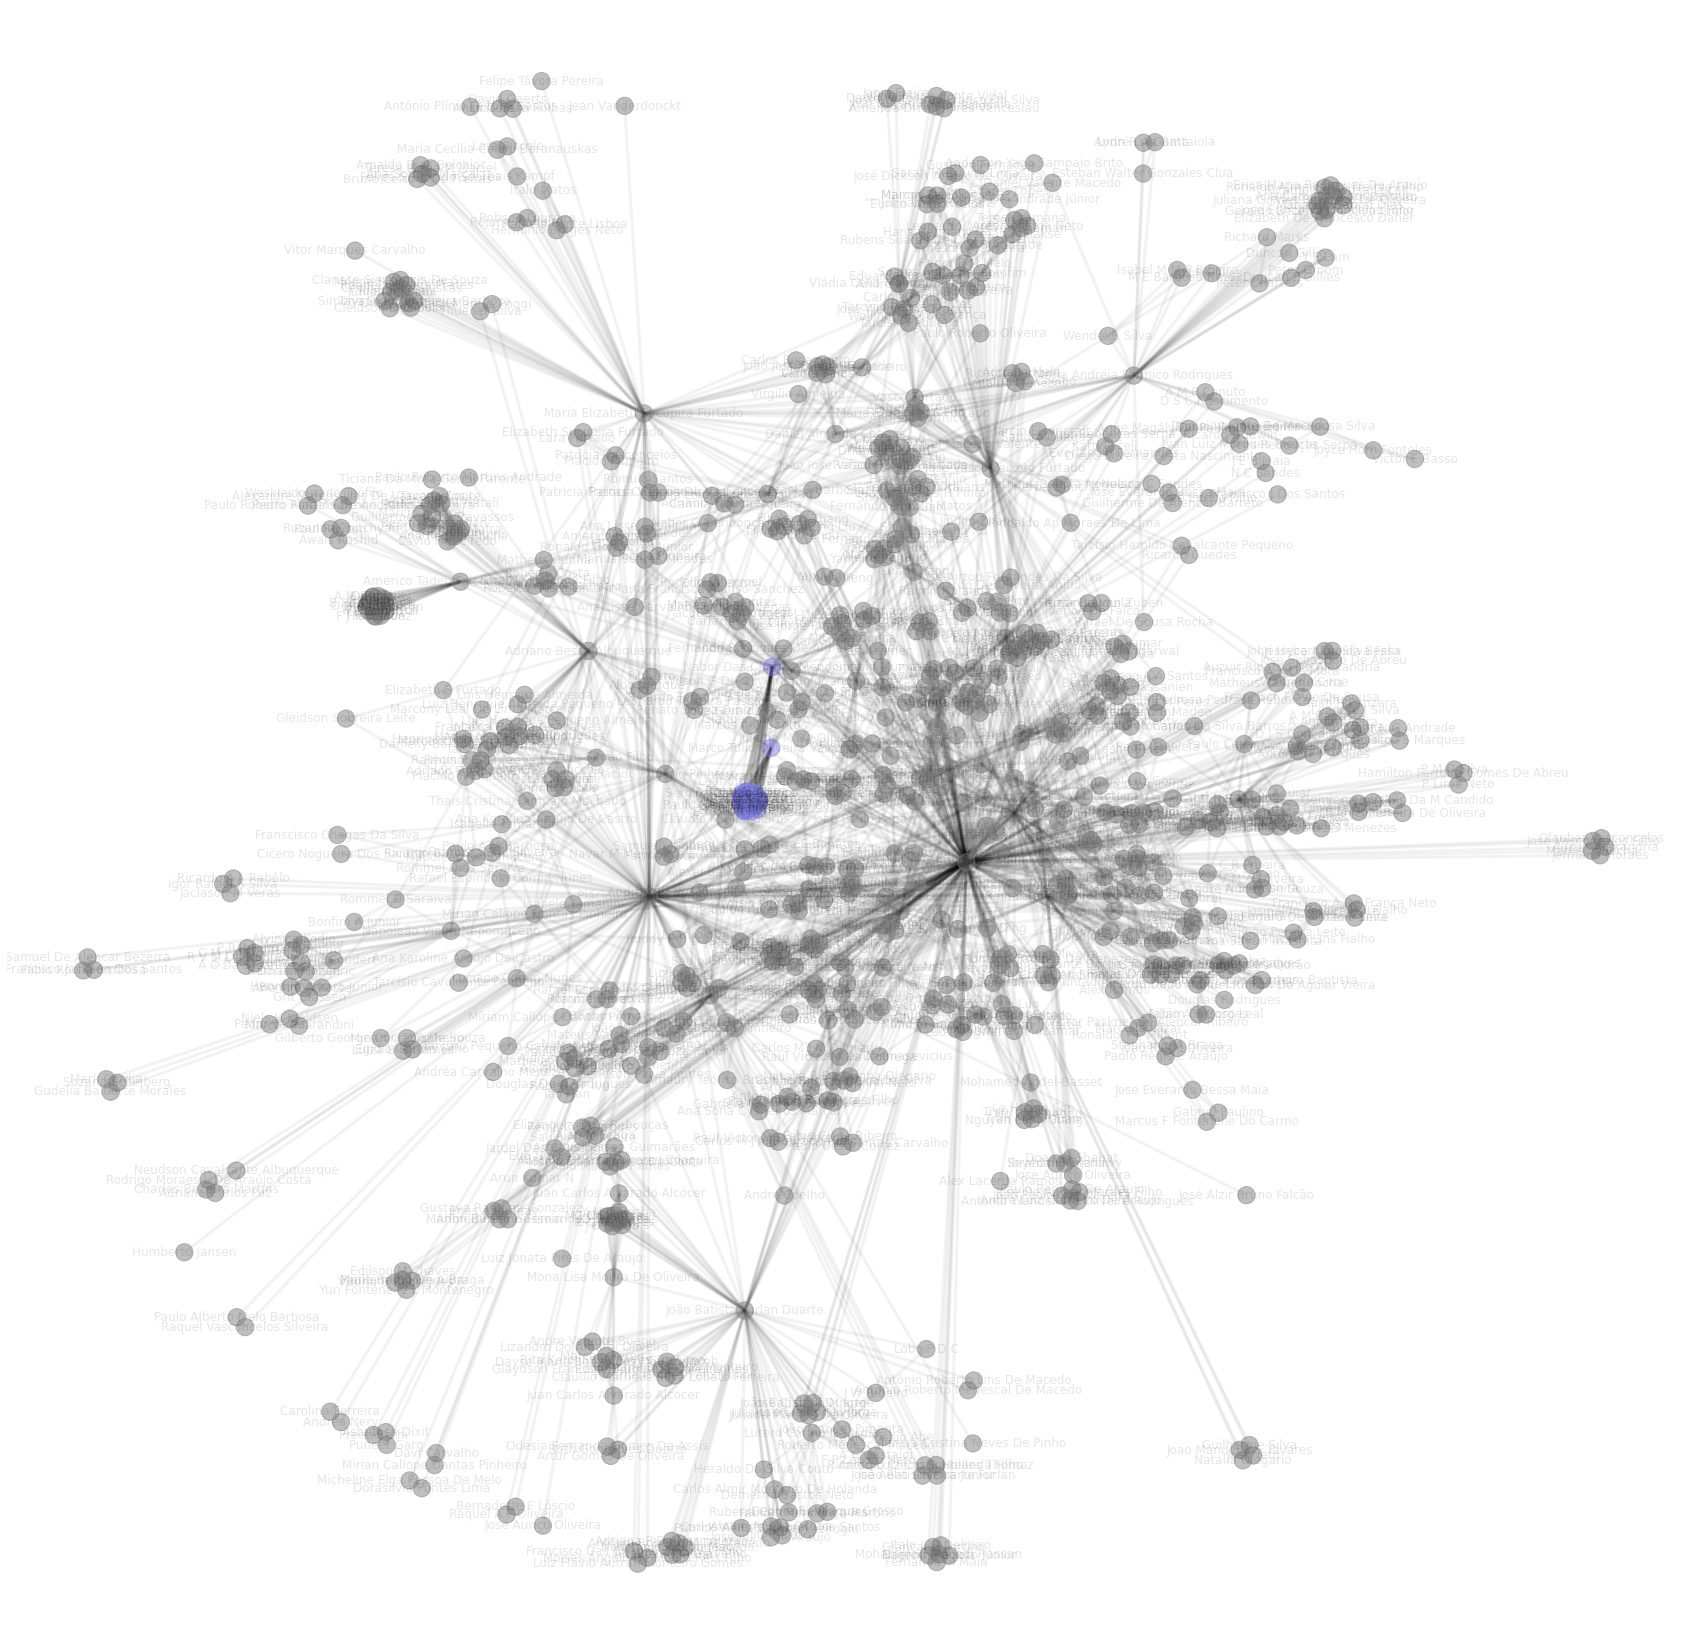

In [37]:
# Create figure
plt.figure(figsize=(30,30))
# Visualize maximum clique
node_color = [(0.5, 0.5, 0.5) for v in G.nodes()]
for i, v in enumerate(G.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)

nx.draw_networkx_edges(G, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(G, pos, node_color=node_color, alpha=.5)
nx.draw_networkx_labels(G, pos, alpha=.1)
plt.savefig(local + 'GRAFO_P3-7.png', dpi=150)

## K-Cores

In [38]:
# Find k-cores
# A k-core is a maximal subgraph that contains nodes of degree k or more.
G_core_10 = nx.k_core(G, 10)
G_core_20 = nx.k_core(G, 20)

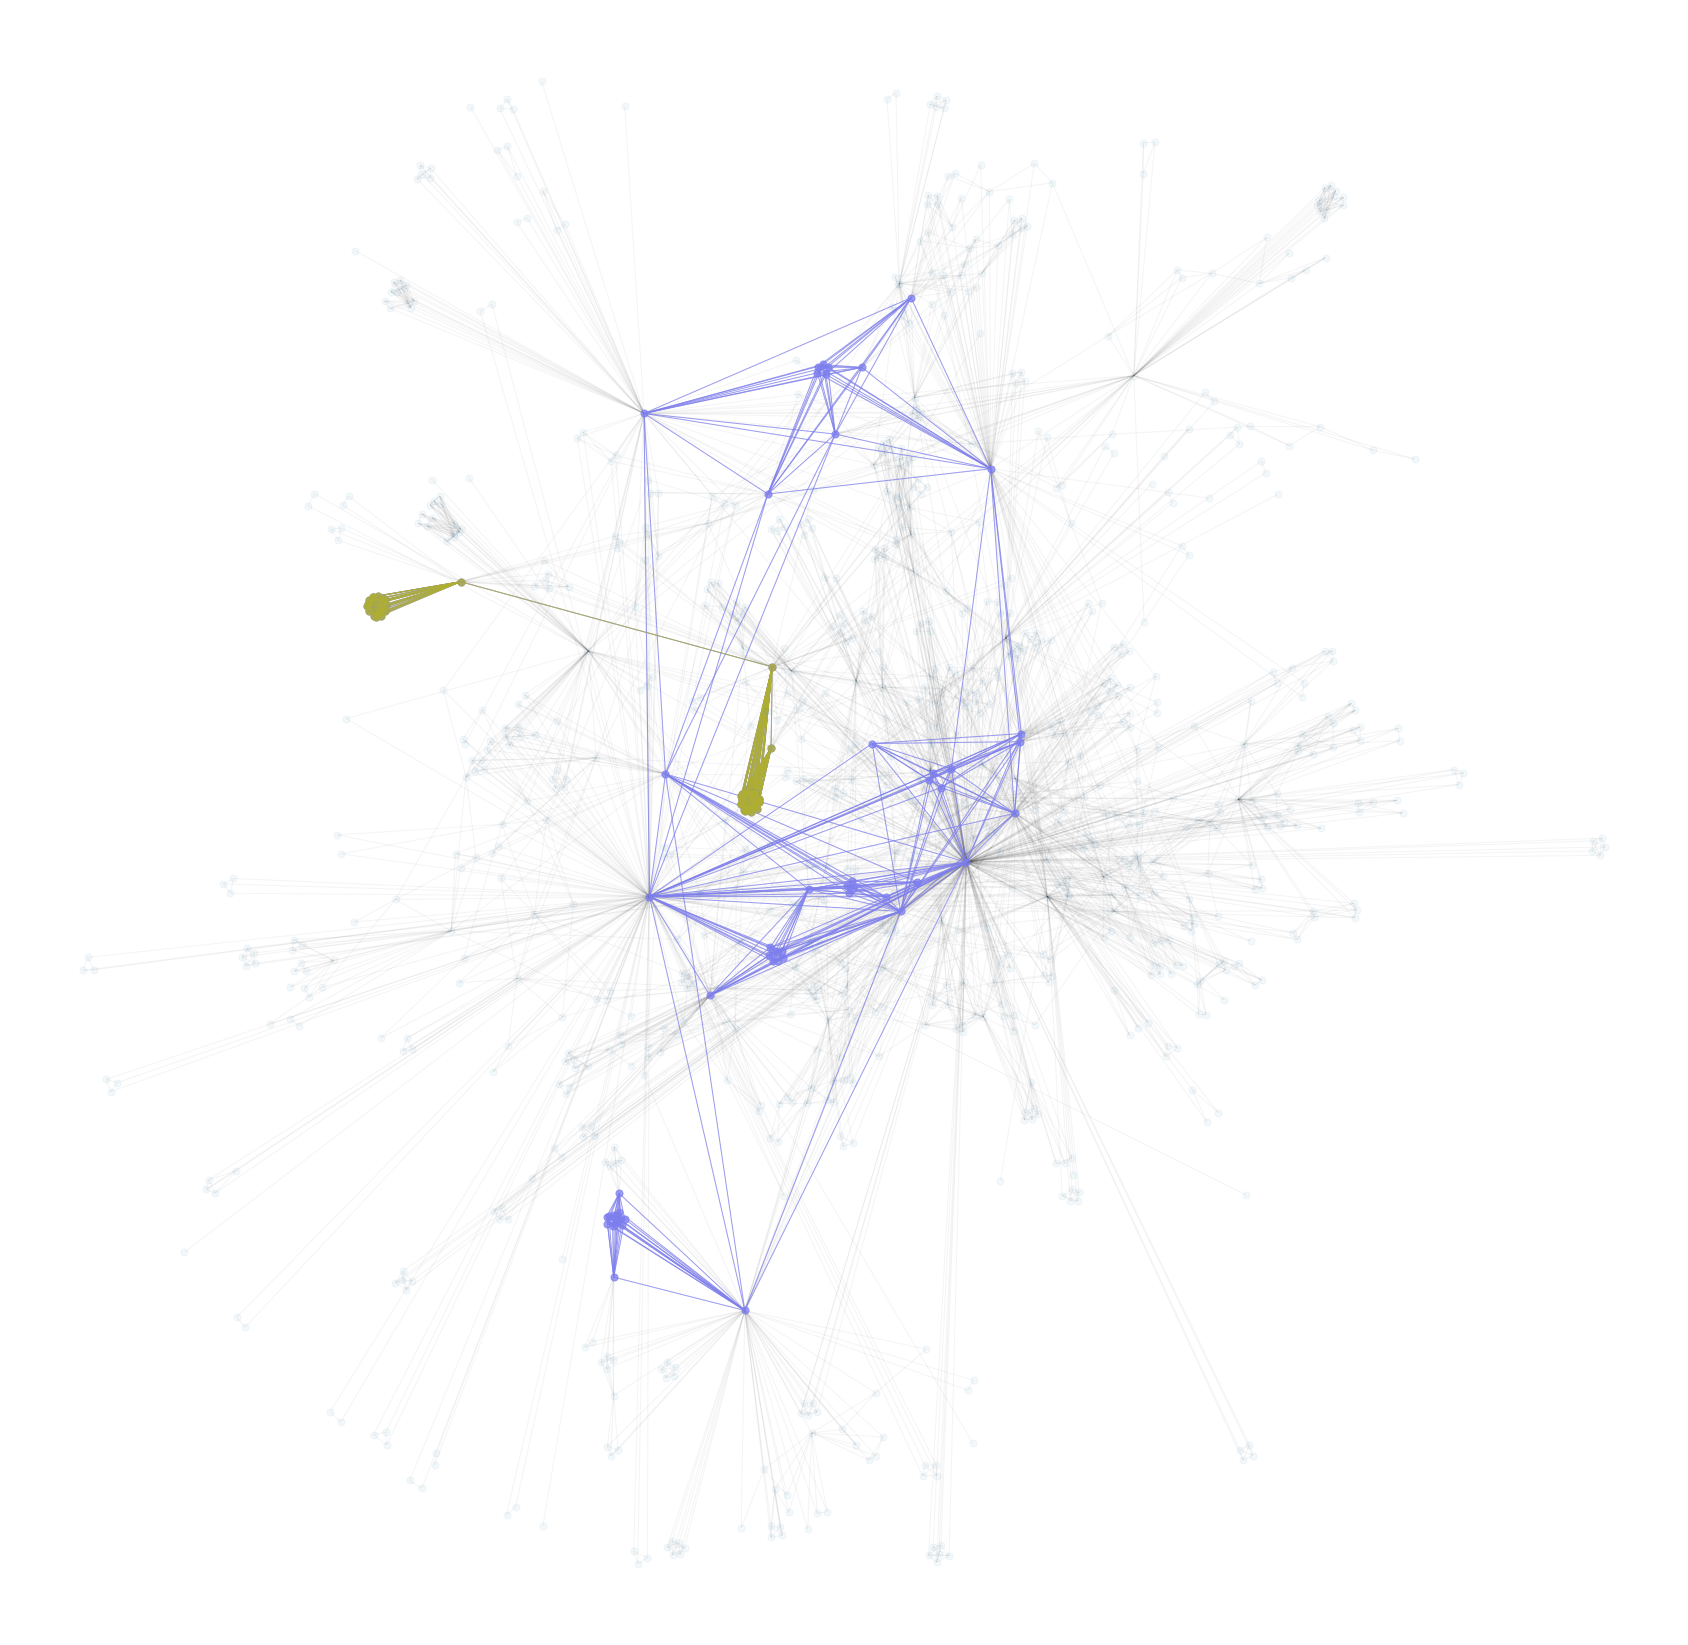

In [39]:
# Create figure
plt.figure(figsize=(30,30))
# Visualize network and k-cores
nx.draw_networkx(
    G, pos=pos, node_size=50, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_10, pos=pos, node_size=50, node_color="#7F7FEF", edge_color="#7F7FEF", alpha=0.75, with_labels=False)
nx.draw_networkx(G_core_20, pos=pos, node_size=50, node_color="#AFAF33", edge_color="#AFAF33", alpha=0.75, with_labels=False)
plt.savefig(local + 'GRAFO_P3-8.png', dpi=150)